### Jilian Dickson
### September 25, 2022
### WGU- D209 PA
### Task 1- KNN 
### Dr. Straw

### Part I: Research Question
#### A.  Describe the purpose of this data mining report by doing the following:
#### 1.  I chose to again consider the readmission rate of rates for patients to hospitals/medical facilities where the readmission is the return of the patient to the hospital or medical facilty within a month of being released.  My research question wants to know if there are certain variables that are most likely to be significant to readmission of patients to hospitals/medical facilities. To answer this question, I will use the provided medical dataset that has patient data. It includes 50 columns (variables) and 10,000 rows, and I will use KNN (K-Nearest Neighbors algorithm).
#### 2.  One goal of this analysis is to see if we can determine how to help hospitals/medical facilties classify patients that are more like to be readmitted based on the varibles in our model. If we are able to do this, these medical facilties could potentially prevent readmission by specializing treatment of those patients during their initial admission. 

### Part II: Method Justification (RealPython)
#### B.  Explain the reasons for your chosen classification method from part A1 by doing the following:
#### 1.  The KNN algorithm tells us that similar things are usually grouped together. This grouping of similar things ideal can help us make conclusions about points (or variables) that are near each other. KNN can be used to make assumptions about variables that we have but don't know much about. It is often used to classify a data point based on how its neighbors are classified. KNN works by taking a data point and uses Euclidean distance to determine its nearest neighbors. The number of neighbors the algorithm looks for is determined by person running the analysis (me, in this instance). Once the neighbors are determined, KNN classifies the new data point in the same class as its neighbors. A predicted outcome of the analysis will be to use KNN on our dataset to better understand whether a patient will be readmitted to the hospital/medical facilty. 
#### 2.  According to RealPython, "The primary assumption that a KNN model makes is that data points/instances which exist in close proximity to each other are highly similar, while if a data point is far away from another group it is dissimilar to those data points. A KNN model calculates similarity using the distance between two points on a graph."
#### 3.  The following are the libraries and their purpose for this analyis: 
##### * numpy – This is used for analysis.
##### * matplotlib.pyplot – This is used for analysis and visualizations.
##### * pandas – This is used for data manipulation and analysis.
##### * from sklearn.metrics - confusion_matrix, accuracy_score – These are used for the visualizations for our analysis.
##### * from sklearn.neighbors import KNeighborsClassifier – This is used in KNN models.
##### * from sklearn.tree import DecisionTreeClassifier – This is also used in KNN models 
##### * from sklearn.model_selection - train_test_split – This is used to split the data for the train/test portion. 
##### * from sklearn.metrics import accuracy_score- This is used to determine the accuracy score.
##### * from sklearn.metrics import roc_auc_score -This is used to calculate the ROC and AUC. 
##### * from sklearn import linear_model- This is used for functions for performing machine learning with linear models.
##### * import matplotlib.pyplot as plt- This is used for used for data visualization.
##### * import seaborn as sns- This is used for data visualization library used for making statistical graphs. 
##### * from sklearn import preprocessing- This is for data standardization.
##### * from sklearn.model_selection import cross_val_score- This is used for determining the cross validation score.
##### * from sklearn.model_selection import GridSearchCV- This is used for applying a grid search to an array of hyper-parameters and cross-validating a model using k-fold cross validation.
##### * from sklearn.metrics import classification_report- This is used for measuring the quality of predictions from a classification algorithm.
##### * from sklearn.preprocessing import StandardScaler- This is used for standardizing data. 
##### * from sklearn.pipeline import Pipeline- This is used for connecting data processing together in sklearn.

### Part III: Data Preparation (Bruce, 2020), (Dickson, 2022)
#### C. Perform data preparation:
#### 1. Much of the data that I am interested in using for my research question is binary (values are currently yes and no) and categorical and will allow the determination of which variables will show if a patient will be readmitted or not by showing yes or no- I will need to recode/dummy code these variables into 0s and 1s in order to use them in my classification analysis.
#### 2. For my analysis, I will use the target response variable ReAdmis (which is binary/categorical) and the possible predictor categorical variables HighBlood, Stroke, Overweight, Arthritis, Diabetes, Hyperlipidemia, BackPain, Asthma, Anxiety, Soft_drink, Allergic_rhinitis, Reflux_esophagitis, along with the continuous variables Income, TotalCharge, Additional_charges. I am also interested in the survey responses named Items #1-#8 in the initial dataset (ordinal and discrete variables and were renamed/recoded by me) because they might have helped patients decide whether or not they were going to seek readmission. Their new names in order are: Survey_TimelyAdmission, Survey_TimelyTreatment, Survey_TimelyVisits, Survey_Reliability, Survey_Options, Survey_Hours, Survey_CourteousStaff, and Survey_EvidenceListening.
#### 3. Before I can do any analysis, I first need to get the data ready. This is an important step because any errors or mistakes here could lead to an incomplete/inaccurate analysis. I began by getting information and the shape of the dataset. I then looked for any duplicates or missing values. After ensuring that there weren't any, I decided to drop the patient demographical data becuase it was not relevant to my analysis as it wouldn't change in the different models. I then renamed my survey responses so that they were easier to identify in the analysis and recoded the binary categorical variables to numeric so that they could be used in the analysis. Finally, the clean and prepared dataset was written to CSV as required.
####    The steps to prepare the 'medical' CSV are the following:
#### a. Load the libraries.
#### b. Read in the dataset into Jupyter lab.
#### c. Get information on the dataset
#### d. Get shape of dataset
#### e. Look for duplicates
#### f. Look for missing values
#### g. Drop variables that are not medical conditions or survey answers (so all demographical data)
#### h. Rename survey items #1-#8 so that they are easier to identify in the analysis
#### i. Recode the binary variables to numeric so that they can be used in my analysis.
#### j. Extract clean data called medical to csv to use for KNN model.
#### 4. Provide a copy of the cleaned data set (included with submission).

In [66]:
#Import libraries needed for analysis (GeeksforGeeks, 2022).
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn import datasets
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

In [35]:
#Read in data using pandas
medical= pd.read_csv('C:/Users/Jilian/Desktop/medical_clean.csv')
medical.head(10)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3
5,6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,...,2636.691180,12742.589910,4,5,4,4,3,5,4,6
6,7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,...,3694.627161,16815.513600,4,3,3,2,3,4,5,5
7,8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,...,3021.499039,6930.572138,1,2,2,5,4,2,4,2
8,9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,-85.50610,...,2968.402860,8363.187290,3,3,2,3,3,3,4,2
9,10,Z229385,5acd5dd3-f0ae-41c7-9540-cf3e4ecb2e27,687e7ba1b80022c310fa2d4b00db199a,Paynesville,MN,Stearns,56362,45.40325,-94.71424,...,3147.855813,26225.989910,5,5,5,3,4,2,3,2


In [36]:
#Get information on data
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [37]:
#Get shape of data
medical.shape

(10000, 50)

In [38]:
#look at data columns
medical.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [39]:
#Look for duplicates:
medical.duplicated().sum()

0

In [40]:
#Look for missing values:
medical.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [41]:
#Drop variables that I am not interested in for my research question
medical = medical.drop(['CaseOrder','Customer_id','Interaction','UID','City','State','County','Zip','Lat','Lng','Population','Area','TimeZone','Job', 'Marital', 'Gender', 'Initial_admin', 'Complication_risk', 'Services'], axis=1)

In [42]:
#Make sure columns were dropped correctly
medical.head(5)

,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,HighBlood,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,53,86575.93,No,19.141466,6,0,0,No,Yes,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,3,51,46805.99,No,18.940352,4,2,1,No,Yes,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,53,14370.14,No,18.057507,4,1,0,No,Yes,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,0,78,39741.49,No,16.576858,4,1,0,No,No,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,1,22,1209.56,No,17.439069,5,0,2,Yes,No,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [43]:
#Rename survey columns (Items #1-#8) so they are easier to understand (Dickson, 2022)
medical.rename(columns={'Item1': 'Survey_TimelyAdmission', 'Item2':'Survey_TimelyTreatment', 'Item3':'Survey_TimelyVisits','Item4': 'Survey_Reliability', 'Item5':'Survey_Options',
'Item6':'Survey_Hours','Item7':'Survey_CourteousStaff','Item8':'Survey_EvidenceListening'}, inplace=True)

In [44]:
#Make sure that the columns were renamed correctly
medical.head(5)

,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,HighBlood,...,TotalCharge,Additional_charges,Survey_TimelyAdmission,Survey_TimelyTreatment,Survey_TimelyVisits,Survey_Reliability,Survey_Options,Survey_Hours,Survey_CourteousStaff,Survey_EvidenceListening
0,1,53,86575.93,No,19.141466,6,0,0,No,Yes,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,3,51,46805.99,No,18.940352,4,2,1,No,Yes,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,53,14370.14,No,18.057507,4,1,0,No,Yes,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,0,78,39741.49,No,16.576858,4,1,0,No,No,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,1,22,1209.56,No,17.439069,5,0,2,Yes,No,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [45]:
#Recode the binary (currently yes/no) variable values to 1s and 0s so that I can use them in my analysis
medical = medical.replace(to_replace = ['Yes','No'],value = [1,0])

In [46]:
#Write new dataset to CSV
medical.to_csv(r'C:/Users/Jilian/Desktop/medical.csv')

### Part IV: Analysis (Datagy.io, 2022), (Dickson, 2022), (Murallie, 2021), (Mulani, 2022), (GeeksforGeeks, 2022).
#### D. Perform the data analysis and report on the results by doing the following:
#### 1. Split the data into training and test data sets and provide the file(s).(code shown below)
#### I began by making the two sets of data- a training set and a test set divided into an 80/20 split where 80 percent was utilized for the training portion and the remaining 20 percent was used for the test portion. We also had to be able to reproduce the results, so we set the seed to one.   Since we are going for as accurate of a model as possible, we started with a higher n-nearest neighbor value of seven (which meant the model would need to check the 7 closest data points) when classifiying it. We then fit our data to our KNN model and predicted the outcomes.
#### 2. Describe the analysis technique you used to appropriately analyze the data.
#### After I ran my first KNN model, it exhibited an accuracy score of 92% as shown in the coded KNN metrics below. Next, I scaled the dataset to see if the accuracy changed at all. (The options for this were that it would stay the same, it would increase, or it would decrease.) I then again split my data into the train portion and test portion and again fit it to my KNN model. My next model resulted in an accuracy score of 89% - this was lower than the first model’s accuracy score of 92%. My next step was to make a confusion matrix- this showed the scaled dataset’s true negatives compared to the false negatives and also the false positives compared to the true positives. Unfortunately for my model, it shows that scaling the model decreased its performance because the accuracy lessened from 0.92 to 0.89 while its precision lowered from 0.97 to 0.93.(code shown below)
#### 3. Provide the code used to perform the classification analysis from part D2. (code shown below)

In [47]:
#Set predictor variables and target variable of ReAdmis
x=medical.drop('ReAdmis',axis=1).values
y=medical['ReAdmis'].values

In [48]:
#set seed (needed to reproduce) and create training and test datasets with 80/20 split (Dickson, 2022), (GeeksforGeeks, 2022)
SEED=1
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20,random_state=SEED)

In [49]:
#Export training and testing data
X_train.tofile(r'C:/Users/Jilian/Desktop/medical_Xtrain.csv',sep=',')
X_test.tofile(r'C:/Users/Jilian/Desktop/medical_Xtest.csv',sep=',')
Y_train.tofile(r'C:/Users/Jilian/Desktop/medical_Ytrain.csv',sep=',')
Y_test.tofile(r'C:/Users/Jilian/Desktop/medical_Ytest.csv',sep=',')

In [50]:
#KNN model- fit data (Datagy.io, 2022)
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [51]:
#Predict outcomes from test data and show initial accuracy score 
Y_pred=knn.predict(X_test)
print('Initial accuracy score of KNN model:',accuracy_score(Y_test,Y_pred))

Initial accuracy score of KNN model: 0.921


In [52]:
#Classification model
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      1261
           1       0.85      0.95      0.90       739

    accuracy                           0.92      2000
   macro avg       0.91      0.93      0.92      2000
weighted avg       0.93      0.92      0.92      2000



In [53]:
#Scale data (Mulani, 2022) (Murallie, 2021)
steps=[('scaler',StandardScaler()),('KNN',KNeighborsClassifier())]
pipeline=Pipeline(steps)

In [54]:
#Split data using 80/20 split and scale data with the pipeline
X_train_scaled,X_test_scaled,Y_train_scaled,Y_test_scaled=train_test_split(x,y,test_size=0.20,random_state=SEED)
KNN_scaled=pipeline.fit(X_train_scaled,Y_train_scaled)

In [55]:
#Predict from scaled data and show the accuracy score 
Y_pred_scaled=pipeline.predict(X_test_scaled)
print(accuracy_score(Y_test_scaled,Y_pred_scaled))

0.89


In [56]:
#Classification model after scaling
print(classification_report(Y_test_scaled,Y_pred_scaled))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1261
           1       0.83      0.89      0.86       739

    accuracy                           0.89      2000
   macro avg       0.88      0.89      0.88      2000
weighted avg       0.89      0.89      0.89      2000



[[1140  121]
 [  37  702]]


<AxesSubplot:>

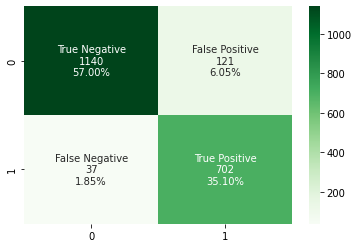

In [57]:
#Confusion matrix and visualization of it in heatmap (PythonGeeks, 2021) (Dickson, 2022)
cf_matrix=confusion_matrix(Y_test,Y_pred)
print(cf_matrix)
group_names=['True Negative','False Positive','False Negative','True Positive']
group_counts=["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages=["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels=[f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in 
zip(group_names,group_counts,group_percentages)]
labels=np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix,annot=labels,fmt='',cmap='Greens')

In [58]:
#Set parameters for the cross validation
param_grid={'n_neighbors':np.arange(1,50)}

In [59]:
#recall KNN (needed for the cross validation), then use GridSearch for the cross validation 
KNN=KNeighborsClassifier()
knn_cv=GridSearchCV(KNN,param_grid,cv=5)

In [60]:
#Fit our model (be patient- this takes awhile)
knn_cv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [61]:
#Show the best parameters and score for said model
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 3}
0.9177500000000001


In [62]:
#Need to look at area under the curve (this also takes a bit)
#Fit to data, look at probabilties of the predictors
knn_cv.fit(x,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [63]:
Y_pred_prob=knn_cv.predict_proba(X_test)[:,1]

In [64]:
#Figure out the AUC (Area Under Curve) score (Statology, 2020)
print((roc_auc_score(Y_test,Y_pred_prob)))

0.9765017775912967


In [65]:
#Then figure out the AUC scores from cross validation (this takes a long time- about 5 minutes) (Statology)
cv_auc=cross_val_score(knn_cv,x,y,cv=5,scoring='roc_auc')
print((cv_auc))

[0.94054771 0.9373297  0.94170315 0.92813728 0.6558256 ]


### Part V: Data Summary and Implications (Statology, 2020)
#### E.  Summarize your data analysis by doing the following:
#### 1.  Explain the accuracy and the area under the curve (AUC) of your classification model.
#### As we discussed and showed above, the method of cross validation was vital for us in determining the best parameters for our KNN model when it used the training data. We were also about to determine our n-neighbor ideal/best parameter of three. The best score that we were able to achieve for our KNN model was .918, and we utilized the results of our validation to determine our AUC score of .9765. Finally, we used our 5 k-folds to cross validate our data and yielded .94054771, .9373297; .94170315, .92813728, .6558256 and a True Postiive Area Under Curve Score of almost 98% (97.65).
#### 2.  Discuss the results and implications of your classification analysis.
#### Our model had some good results. We were able to get .89 for our accuracy score- this shows us that our model was able to predict our patients' end result 89% (out of 100% possible). We were also able to achieve .93 for our precision score- this means that our model could tell us 93% (out of 100% possible) of the time that a patient was not readmitted to the hospital/medical facilty. Finally, we had an AUC score of 0.9765- this was a very good score. According to Statology, "The maximum possible AUC value that you can achieve is 1. This is the perfect score and would mean that your model is predicting each observation into the correct class." Since our score was very close to this "perfect 1", we were able to conclude that we can be certain that our model will predict the True Positives correctly. Simply put, hospitals/medical care facilities can use this model to make predicitions of whether or not a patient would be readmitted using the predictors values chosen. 
#### 3.  Discuss one limitation of your data analysis.
#### To me, the biggest limitation of my data analysis was my choosing of the k value for the algorithm's k-Nearest Neighbor. It was difficult for me to decide what values to use for the k value because I wanted to try and have a model that was as accurate as possible. The issue with this lies in figuring where to start. Since the averages are between 5 and 10, I decided to start in the middle with the value of 7 in the effort to avoid over-fitting the model with too high of a value and under-fitting by using too low of value. As mentioned in Statology, over-fitting or under-fitting our KNN model would cause data that would not accurate nor helpful in any type of classification. By using the available models in sklearn that allow for tuning and scaling, we were able to determine that the ideal K value for us was three.  
#### 4.  Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.
#### In my opinion, the best course of action for a hospital/medical care facility would be to continue to narrow down individual predictor variables (the specific health conditions and survey questions that were included in the dataset) that provide the highest effect on patients re-entering/being remadmitted to the hospital/medical care facilities. Using these predictors to classify patients, the hospital/medical facility could cut down on patients' expenses due to more specified treatment during the initial admission and thus preventing readmission. 

### Part VI: Demonstration
#### F.  Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.


### Link to Panopto recording: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=323e9b5f-720d-4657-ba59-af29011c6b51

#### G/H. 

#### RealPython. (n.d.). RealPython. KNN Classifier in Python.
#### Retrieved September 25, 2022, from https://realpython.com/knn-python/

#### BRUCE, P. A. (2020).  O'Reilly Media, Incorporated. Practical statistics for data scientists. 50+ essential concepts using r and python.
#### Retrieved from WGU Library on September 25, 2022. 

#### GeeksforGeeks. (August 21, 2022). GeeksforGeeks. k-nearest neighbor algorithm in Python
#### Retrieved September 25, 2022, from https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/

#### Trevisan, Vinicius (January 21, 2022). Towards Data Science. Interpreting ROC Curve and ROC AUC for Classification Evaluation
#### Retrieved September 25, 2022, from https://towardsdatascience.com/interpreting-roc-curve-and-roc-auc-for-classification-evaluation

#### Dickson, J. (August 29, 2022). D208-PA-Multiple-Regression-JilianDickson

#### GeeksforGeeks. (September 13, 2022). GeeksforGeeks. Random Seed In Python
#### Retrieved September 26, 2022, from https://www.geeksforgeeks.org/random-seed-in-python/

#### PythonGeeks. (2022) PythonGeeks. Python Heat Maps
#### Retrieved September 16, 2022, from https://pythongeeks.org/python-heat-maps/

#### Datagy.io. (February 13, 2022). Datagy.io. K-Nearest Neighbor (KNN) Algorithm in Python
#### Retrieved September 27, 2022, from https://datagy.io/python-knn/

#### Murallie, Thuwarakesh (December 27, 2021). Towards Data Science. Use Pipe Operations in Python for More Readable and Faster Coding
#### Retrieved October 4, 2022, from https://towardsdatascience.com/pipe-operations-in-python-1e8f8debe26

#### Mulani, Safa. (August 2, 2022). DigitalOcean. Using StandardScaler() Function to Standardize Python Data
#### Retrieved October 4, 2022, from https://www.digitalocean.com/community/tutorials/standardscaler-function-in-python

#### Smith, Zach. (November 4, 2020). Statology. An Easy Guide to K-Fold Cross-Validation
#### Retrieved October 8, 2022, from https://www.statology.org/k-fold-cross-validation/
